## Random Forest

In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.stats import randint
import joblib
import matplotlib.pyplot as plt

# Load data
train = pd.read_csv(r'C:\Users\cheng\Documents\GitHub\Data_Mining_Project\UMA_IE500_Data_Mining\full dataset preparation and baseline model evaluation\train_data.csv')
val = pd.read_csv(r'C:\Users\cheng\Documents\GitHub\Data_Mining_Project\UMA_IE500_Data_Mining\full dataset preparation and baseline model evaluation\val_data.csv')

X_train = train.drop('is_canceled', axis=1)
y_train = train['is_canceled']

X_val = val.drop('is_canceled', axis=1)
y_val = val['is_canceled']

In [4]:
print("\n=== Random Forest (Randomized Search) ===")
rf = RandomForestClassifier(random_state=42)

param_dist = {
    'n_estimators': randint(100, 300),          # more trees, stabilizes performance
    'max_depth': randint(10, 50),               # allow deeper trees (but avoid overfitting)
    'min_samples_split': randint(2, 10),        # smaller → allow splits → better recall
    'min_samples_leaf': randint(1, 5),          # smaller → more granular → better recall
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=50,
    scoring='recall',  # prioritize recall
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print("Best Params:", random_search.best_params_)

best_rf = random_search.best_estimator_
y_pred_rf = best_rf.predict(X_val)

accuracy = accuracy_score(y_val, y_pred_rf)
precision = precision_score(y_val, y_pred_rf)
recall = recall_score(y_val, y_pred_rf)
f1 = f1_score(y_val, y_pred_rf)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


=== Random Forest (Randomized Search) ===
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Params: {'bootstrap': False, 'max_depth': 34, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 158}
Accuracy: 0.8971
Precision: 0.8937
Recall: 0.8231
F1 Score: 0.8570


In [5]:
# Save Random Forest best model
joblib.dump(best_rf, 'random_forest_best_model.pkl')
print("Random Forest model saved as random_forest_best_model.pkl")

Random Forest model saved as random_forest_best_model.pkl


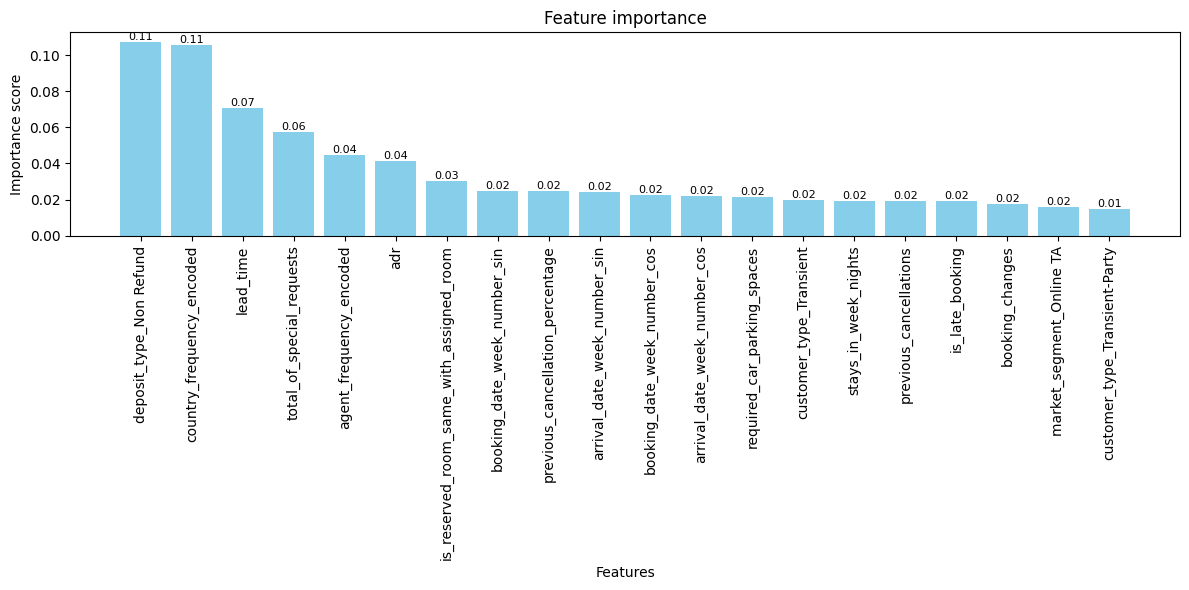

In [12]:


# Load model
model = joblib.load(r'C:\Users\cheng\Documents\GitHub\UMA_IE500_Data_Mining\Model_training\random_forest_best_model.pkl')


# Get feature importances
feature_names = X_train.columns
importances = model.feature_importances_

# Create Series and get top 20
top_n = 20
feat_importance = pd.Series(importances, index=feature_names).sort_values(ascending=False).head(top_n)

# Plot vertical bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(feat_importance.index, feat_importance.values, color='skyblue')
plt.xticks(rotation=90)
plt.title("Feature importance")
plt.ylabel("Importance score")
plt.xlabel("Features")

# Add text labels next to bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height, f'{height:.2f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()



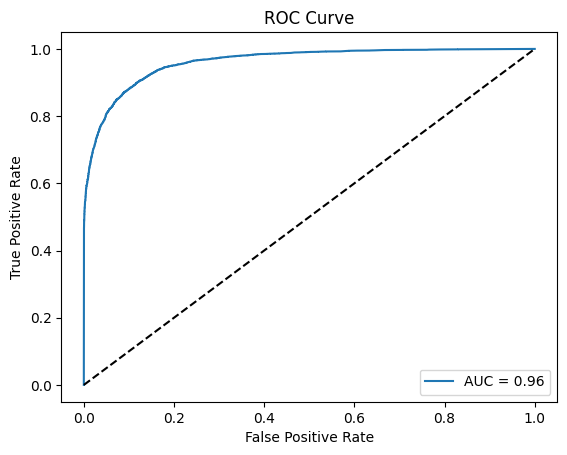

In [6]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities
y_proba = model.predict_proba(X_val)[:, 1]

# Calculate ROC
fpr, tpr, thresholds = roc_curve(y_val, y_proba)
roc_auc = auc(fpr, tpr)

# Plot
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()
